In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 

In [2]:
from IPython.display import display


In [3]:
from matplotlib import colormaps


In [4]:
df=pd.read_csv("Crime_Data_from_2020_to_Present - Copy.csv")
pd.set_option("display.max_columns",None)

In [5]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


# Data cleaning 

In [6]:
df.duplicated().value_counts() 

False    1004847
Name: count, dtype: int64

# no duplicate values 

In [7]:
df.shape

(1004847, 28)

In [9]:
df.drop(columns=['Crm Cd','Premis Desc'],inplace=True) #duplicate columns in data set 

In [8]:
df.isnull().sum()

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            151591
Vict Age                0
Vict Sex           144604
Vict Descent       144616
Premis Cd              16
Premis Desc           588
Weapon Used Cd     677654
Weapon Desc        677654
Status                  1
Status Desc             0
Crm Cd 1               11
Crm Cd 2           935717
Crm Cd 3          1002532
Crm Cd 4          1004783
LOCATION                0
Cross Street       850626
LAT                     0
LON                     0
dtype: int64

 lot of null values

In [10]:
# lets see the percentage of missing values 
for col in df.columns:
    missing_percentage = np.mean(df[col].isnull())*100
    print("{} - {}%" .format(col,round(missing_percentage,2)))

DR_NO - 0.0%
Date Rptd - 0.0%
DATE OCC - 0.0%
TIME OCC - 0.0%
AREA - 0.0%
AREA NAME - 0.0%
Rpt Dist No - 0.0%
Part 1-2 - 0.0%
Crm Cd Desc - 0.0%
Mocodes - 15.09%
Vict Age - 0.0%
Vict Sex - 14.39%
Vict Descent - 14.39%
Premis Cd - 0.0%
Weapon Used Cd - 67.44%
Weapon Desc - 67.44%
Status - 0.0%
Status Desc - 0.0%
Crm Cd 1 - 0.0%
Crm Cd 2 - 93.12%
Crm Cd 3 - 99.77%
Crm Cd 4 - 99.99%
LOCATION - 0.0%
Cross Street - 84.65%
LAT - 0.0%
LON - 0.0%


In [11]:
values = {"Premis Cd": "No Premises Code ","Status":"Not Given","Crm Cd 1":"No Crime Code Given","Vict Sex":"Unknown","Vict Descent":"Unknown","Weapon Used Cd":"No Weapon Recorded","Weapon Desc":"No Weapon Recorded","Mocodes":"No Mocodes Given"}
df.fillna(value=values,inplace=True) # filled categorical data 

In [12]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,VEHICLE - STOLEN,No Mocodes Given,0,M,O,101.0,No Weapon Recorded,No Weapon Recorded,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,No Weapon Recorded,No Weapon Recorded,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,BIKE - STOLEN,0344 1251,19,X,X,502.0,No Weapon Recorded,No Weapon Recorded,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,No Weapon Recorded,No Weapon Recorded,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,VEHICLE - STOLEN,No Mocodes Given,0,Unknown,Unknown,101.0,No Weapon Recorded,No Weapon Recorded,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


null values has been filled for mostly columns 

but these columns has lot of null nvalues 

Crm Cd 2 - 93.12%

Crm Cd 3 - 99.77%

Crm Cd 4 - 99.99%

so we are going to drop them and we will deal with crm cd 1 that has main crime code in it 

In [13]:
df.drop(columns=['Crm Cd 2','Crm Cd 3','Crm Cd 4'],inplace=True)

In [14]:
df.drop(columns=['Cross Street'],inplace=True)

In [15]:
# dropped the columns which are not required 

In [16]:
# lets check the datatypes and along with data inconsistencies 
df=df.convert_dtypes() #data converted into suitable format 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004847 entries, 0 to 1004846
Data columns (total 22 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1004847 non-null  Int64  
 1   Date Rptd       1004847 non-null  string 
 2   DATE OCC        1004847 non-null  string 
 3   TIME OCC        1004847 non-null  Int64  
 4   AREA            1004847 non-null  Int64  
 5   AREA NAME       1004847 non-null  string 
 6   Rpt Dist No     1004847 non-null  Int64  
 7   Part 1-2        1004847 non-null  Int64  
 8   Crm Cd Desc     1004847 non-null  string 
 9   Mocodes         1004847 non-null  string 
 10  Vict Age        1004847 non-null  Int64  
 11  Vict Sex        1004847 non-null  string 
 12  Vict Descent    1004847 non-null  string 
 13  Premis Cd       1004847 non-null  object 
 14  Weapon Used Cd  1004847 non-null  object 
 15  Weapon Desc     1004847 non-null  string 
 16  Status          1004847 non-null  st

In [18]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [19]:
df.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1-2,crm_cd_desc,mocodes,vict_age,vict_sex,vict_descent,premis_cd,weapon_used_cd,weapon_desc,status,status_desc,crm_cd_1,location,lat,lon
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,VEHICLE - STOLEN,No Mocodes Given,0,M,O,101.0,No Weapon Recorded,No Weapon Recorded,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,No Weapon Recorded,No Weapon Recorded,IC,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,BIKE - STOLEN,0344 1251,19,X,X,502.0,No Weapon Recorded,No Weapon Recorded,IC,Invest Cont,480.0,1400 W 37TH ST,34.021,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,No Weapon Recorded,No Weapon Recorded,IC,Invest Cont,343.0,14000 RIVERSIDE DR,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,VEHICLE - STOLEN,No Mocodes Given,0,Unknown,Unknown,101.0,No Weapon Recorded,No Weapon Recorded,IC,Invest Cont,510.0,200 E AVENUE 28,34.082,-118.213


In [20]:
# we can see the problem with date reported and time occ

In [21]:
# date extracted and stored in new column 
df['date_reported']=df['date_rptd'].str[:11]
df['date_reported']=pd.to_datetime(df['date_reported'])

In [22]:

# date extracted and stored in new column 
df['date_occ']=df['date_occ'].str[:11]
df['date_occ']=pd.to_datetime(df['date_occ'])

In [23]:
df['date_occ']

0         2020-03-01
1         2020-02-08
2         2020-11-04
3         2020-03-10
4         2020-09-09
             ...    
1004842   2024-07-23
1004843   2024-01-15
1004844   2024-10-11
1004845   2024-04-24
1004846   2024-08-12
Name: date_occ, Length: 1004847, dtype: datetime64[ns]

In [24]:
df['time_occ'] # we can see that time is not in format 

0          2130
1          1800
2          1700
3          2037
4           630
           ... 
1004842    1400
1004843     100
1004844    2330
1004845    1500
1004846    2300
Name: time_occ, Length: 1004847, dtype: Int64

In [25]:
df['time_occ']=df['time_occ'].astype(str).str.extract("(\d+)") #extracting the numerical and stored in sam ecolumn 
df['time_occ']=df['time_occ'].astype(str).str.zfill(4)     # filled with zero like 630 into 0630
df['time_occ'] = pd.to_datetime(df['time_occ'], format="%H%M").dt.time 

In [26]:
# extracting year from date column

In [27]:
df['year']=df['date_occ'].dt.year
df['year'].value_counts()

year
2022    235252
2023    232353
2021    209871
2020    199846
2024    127525
Name: count, dtype: int64

In [28]:
# droping the year 2025 beacause it can create class imbalance in data 
df.drop(df.loc[df['year']==2025].index,inplace=True) 

# outlier detection 

In [29]:
df.describe()

,dr_no,date_occ,area,rpt_dist_no,part_1-2,vict_age,lat,lon,date_reported,year
count,1004847.0,1004847,1004847.0,1004847.0,1004847.0,1004847.0,1004847.0,1004847.0,1004847,1.004847e+06
mean,220217053.407072,2022-05-13 14:43:03.129969408,10.691467,1115.606779,1.400307,28.919047,33.998198,-118.09083,2022-05-25 18:27:24.493937152,2.021878e+03
min,817.0,2020-01-01 00:00:00,1.0,101.0,1.0,-4.0,0.0,-118.6676,2020-01-01 00:00:00,2.020000e+03
25%,210616815.5,2021-04-06 00:00:00,5.0,587.0,1.0,0.0,34.0147,-118.4305,2021-04-21 00:00:00,2.021000e+03
50%,220915782.0,2022-05-26 00:00:00,11.0,1139.0,1.0,30.0,34.0589,-118.3225,2022-06-07 00:00:00,2.022000e+03
75%,231110142.5,2023-06-22 00:00:00,16.0,1613.0,2.0,44.0,34.1649,-118.2739,2023-07-04 00:00:00,2.023000e+03
max,252104036.0,2024-12-30 00:00:00,21.0,2199.0,2.0,120.0,34.3343,0.0,2025-01-17 00:00:00,2.024000e+03
std,13188350.077686,NaN,6.110286,611.162235,0.489961,21.992244,1.610827,5.582785,NaN,1.314717e+00


# as we can see here that we have outliers in age coulumn and more than 25% data is equal to zero or less than zero and max value is 120   , lets check the data distribution through box plot 

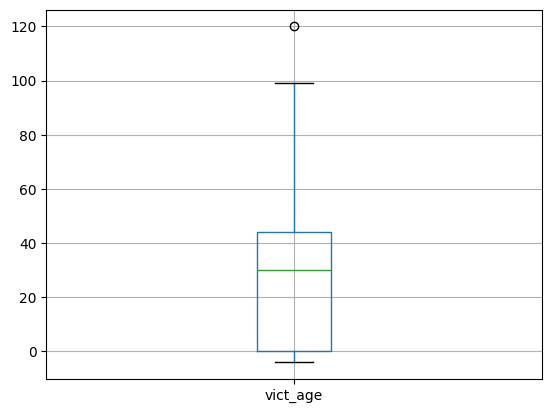

In [30]:
df.boxplot(column='vict_age')
plt.show()

In [31]:
# we have to fill the outliers with nan cause the data is to much if we fill the data with any method it can be biased 
# or we can use ml as well to fill the data if we need further analysis
df.loc[df['vict_age']<=0,'vict_age']=np.nan


In [32]:
# df.drop(df.loc[df['vict_age']>100].index)  we can either drop this of fill it with measure 

In [33]:
df.loc[df['vict_age']>100,'vict_age']=df['vict_age'].median() # sinle outlier above age 100 filled with median 

# EDA

In [34]:
# list(colormaps)

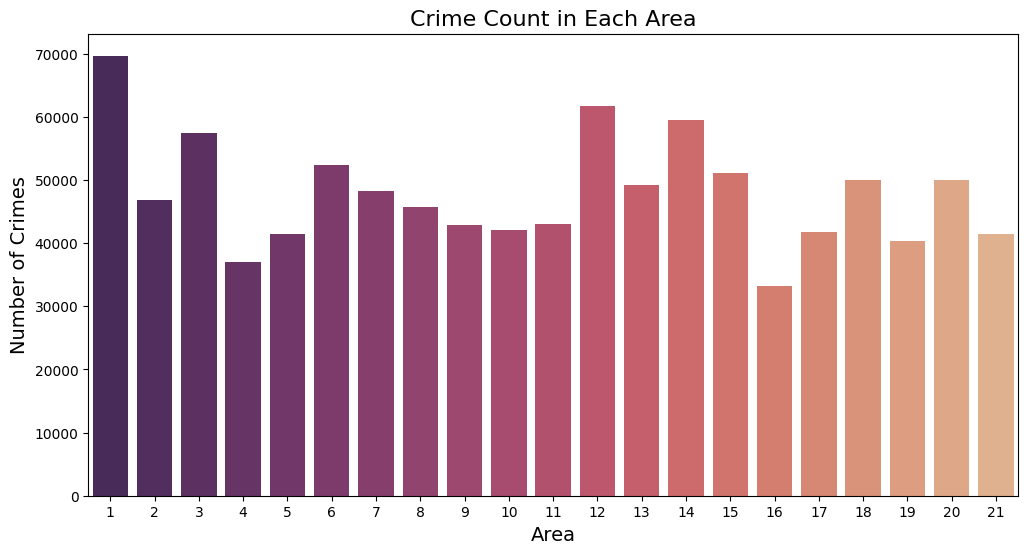

In [35]:
# Count the number of crimes in each area
crime_counts = df['area'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=crime_counts.index, y=crime_counts.values, palette="flare_r",hue=crime_counts.index,legend=False)

plt.xlabel("Area", fontsize=14)
plt.ylabel("Number of Crimes", fontsize=14)
plt.title("Crime Count in Each Area", fontsize=16)

plt.show()


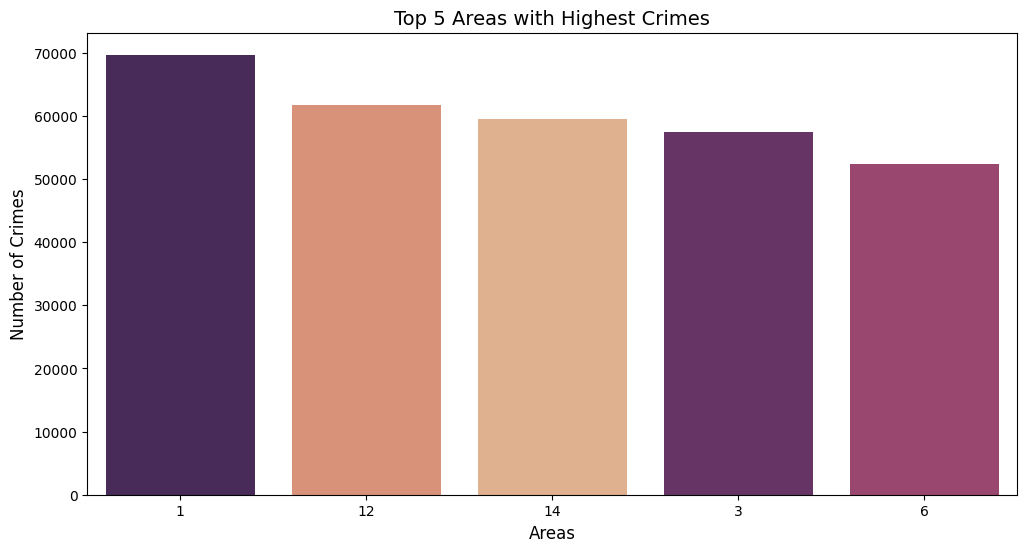

In [36]:
# top 5 areas with heighest crimes 

crime_counts = df['area'].value_counts().sort_values(ascending=False).head(5)

# declaring variable name and converting into dataframe for sort 
crime_counts_df = crime_counts.reset_index()
crime_counts_df.columns = ['Area', 'Crime Count']
crime_counts_df = crime_counts_df.sort_values(by="Crime Count", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="Area", y="Crime Count", data=crime_counts_df, order=crime_counts_df["Area"], palette="flare_r",hue='Area',legend=False)

plt.title("Top 5 Areas with Highest Crimes", fontsize=14)
plt.xlabel("Areas", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)

plt.show()


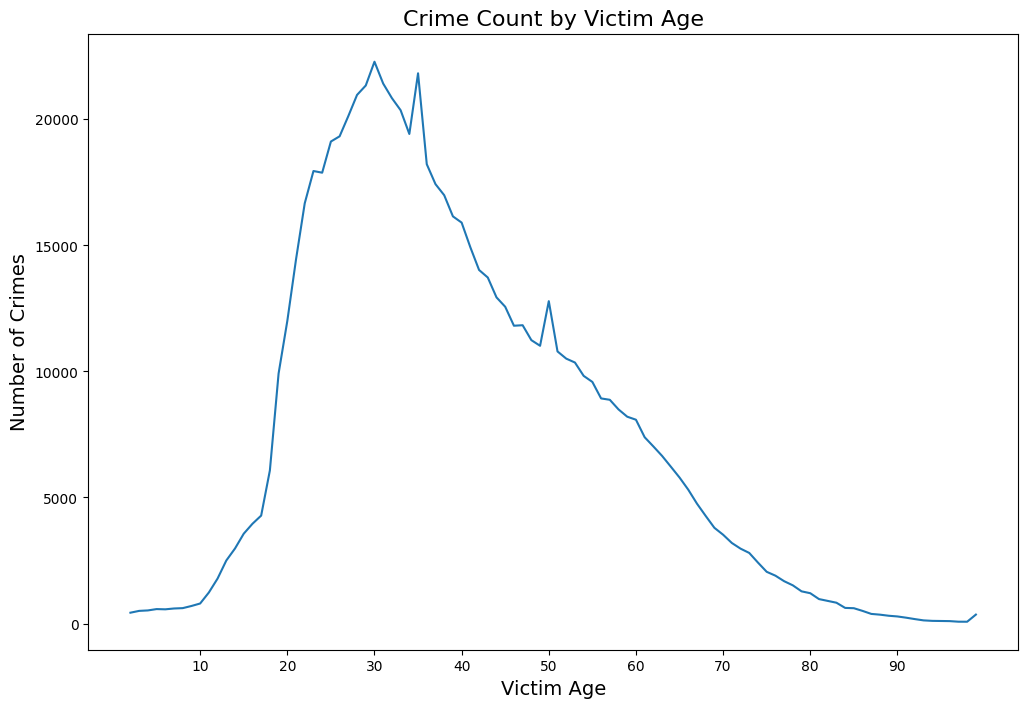

In [37]:
# count the number of crime by age 

age_count=df[['dr_no','vict_age']].groupby(by="vict_age",as_index=False).count()
plt.figure(figsize=(12, 8))
sns.lineplot(age_count,x='vict_age',y='dr_no')
plt.xlabel("Victim Age", fontsize=14)
plt.ylabel("Number of Crimes", fontsize=14)
plt.title("Crime Count by Victim Age", fontsize=16)
plt.xticks(range(10,100,10))
plt.show()

# more crime happen to the vict-age  from 20 to 60

In [38]:
# If the warning is in output ( Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.
# ignore it or we can handle it by adding hue and legend 

C:\Users\raksh\AppData\Local\Temp\ipykernel_17824\3710760032.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data =data ,palette='mako_r')


Text(0.5, 0, 'Status')

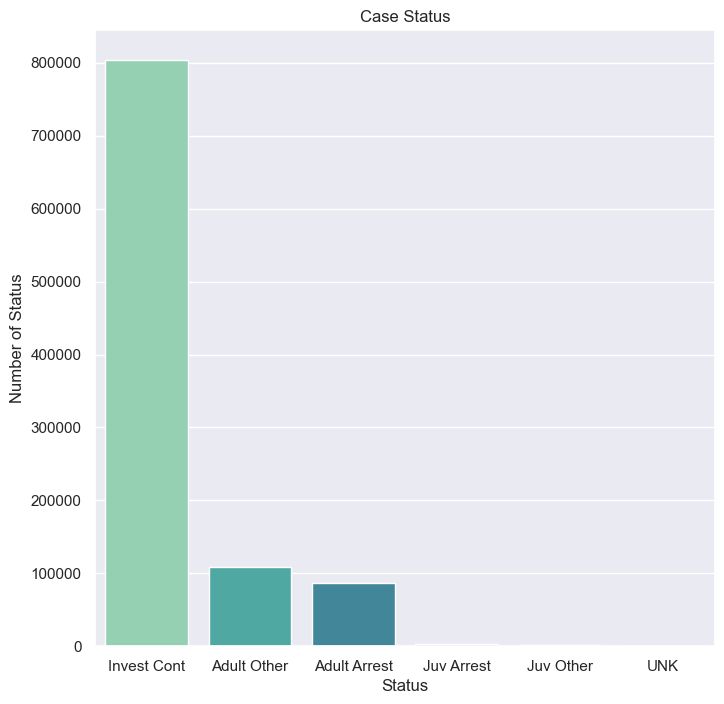

In [39]:
# plt.figure(figsize=(8, 8))

sns.set(rc={'figure.figsize':(8,8)})
data=df['status_desc'].value_counts()
sns.barplot(data =data ,palette='mako_r')
plt.title("Case Status")
plt.ylabel("Number of Status")
plt.xlabel("Status")


In [40]:
# most cases are under investigation 

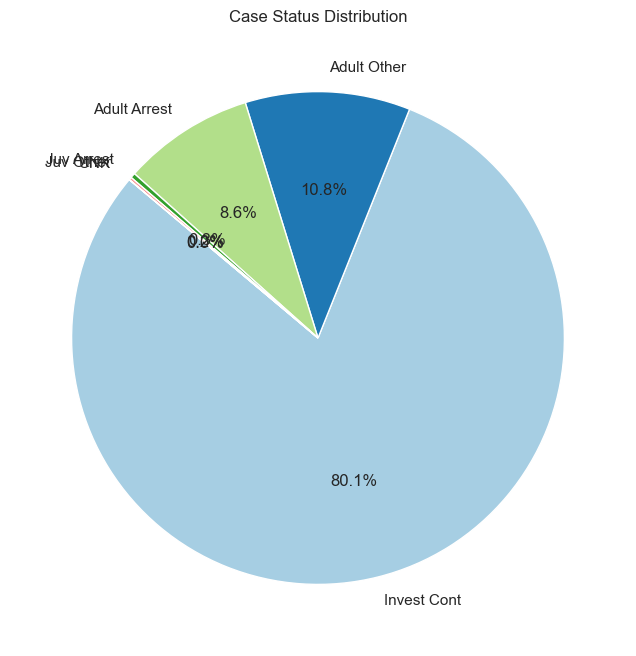

In [41]:
# lets check it through pie chart as well for better representation


status_counts = df['status_desc'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title("Case Status Distribution")
plt.show()


C:\Users\raksh\AppData\Local\Temp\ipykernel_17824\1891217378.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_counts.values, y=crime_counts.index, palette="viridis")


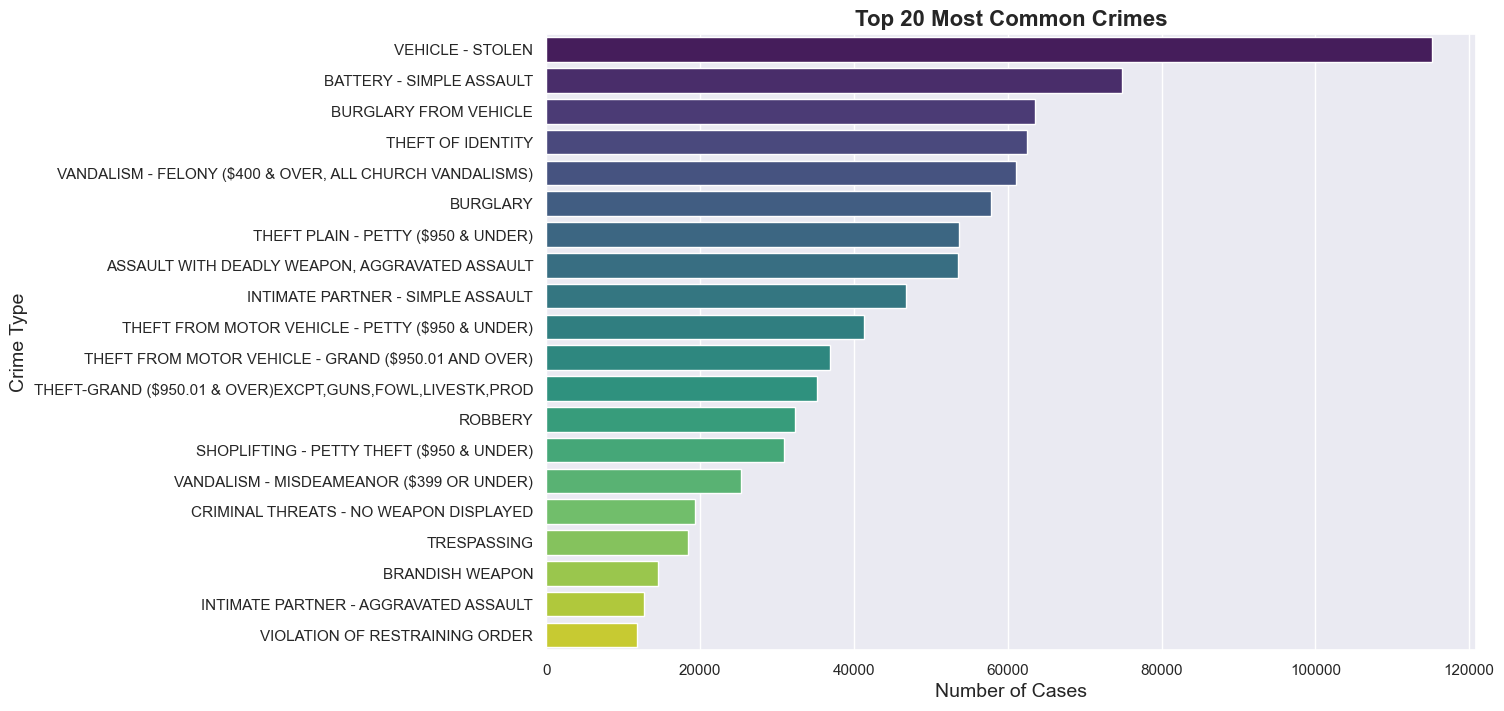

In [42]:
# top 20 most common crimes 

crime_counts = df['crm_cd_desc'].value_counts().head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=crime_counts.values, y=crime_counts.index, palette="viridis")

plt.title("Top 20 Most Common Crimes", fontsize=16, fontweight="bold")
plt.xlabel("Number of Cases", fontsize=14)
plt.ylabel("Crime Type", fontsize=14)

plt.show()


C:\Users\raksh\AppData\Local\Temp\ipykernel_17824\3155283647.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_counts.values, y=crime_counts.index, palette="viridis")


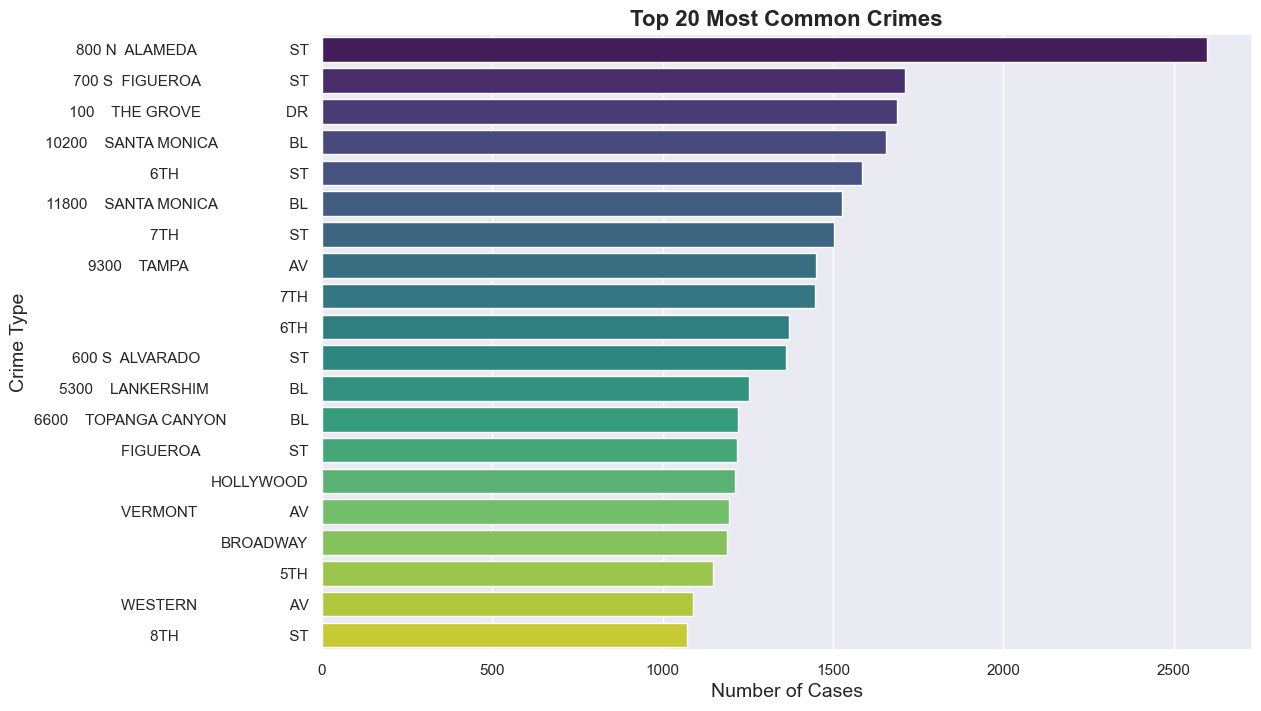

In [43]:
# top 20 most common crimes 

crime_counts = df['location'].value_counts().head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=crime_counts.values, y=crime_counts.index, palette="viridis")

plt.title("Top 20 Most Common Crimes", fontsize=16, fontweight="bold")
plt.xlabel("Number of Cases", fontsize=14)
plt.ylabel("Crime Type", fontsize=14)

plt.show()


<!-- lets see crime over time  -->

# lets see crime over time(years)

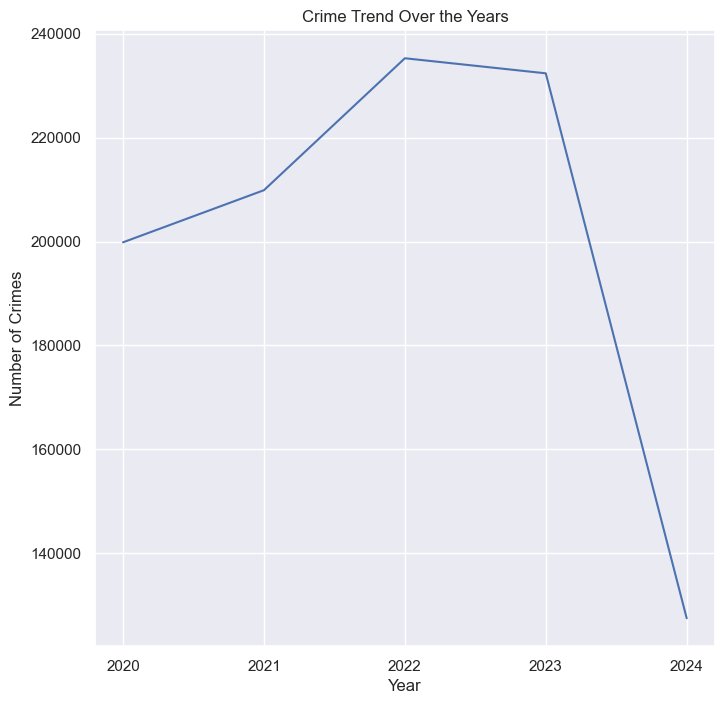

In [44]:
# Crime Trend over TIme 
crime_over_year=df[['year']].groupby('year',as_index=False).size()

sns.lineplot(x=crime_over_year['year'],y=crime_over_year['size'],markers="o")
plt.title("Crime Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.grid(True)
plt.xticks(range(2020,2025,1))
plt.show()


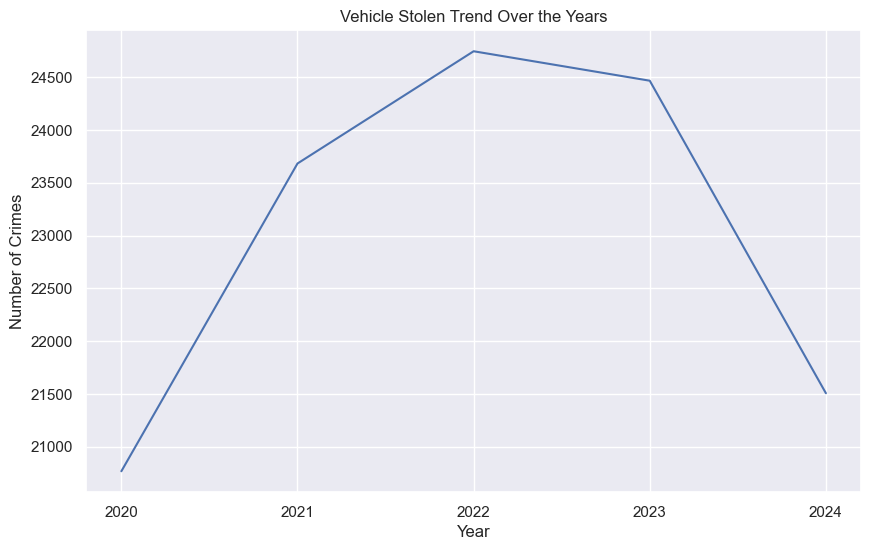

In [45]:
# Group data by year and count occurrences of crime code 510.0 that is vehicle stolen crime(top common crime in the city )


year_grouped_crime_vehicle_stolen = df[df["crm_cd_1"] == 510.0].groupby("year", as_index=False).size()

plt.figure(figsize=(10, 6))
sns.lineplot(x=year_grouped_crime_vehicle_stolen["year"], y=year_grouped_crime_vehicle_stolen["size"])

plt.title("Vehicle Stolen Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.xticks(range(2020,2025,1))
plt.show()

In [46]:
# Let's determine when the crime occurs most frequently.      -> by hours

In [47]:
df['hour']=df['time_occ'].astype(str).str[0:2] # new column created for hour data 

Text(0, 0.5, 'Number of Crimes')

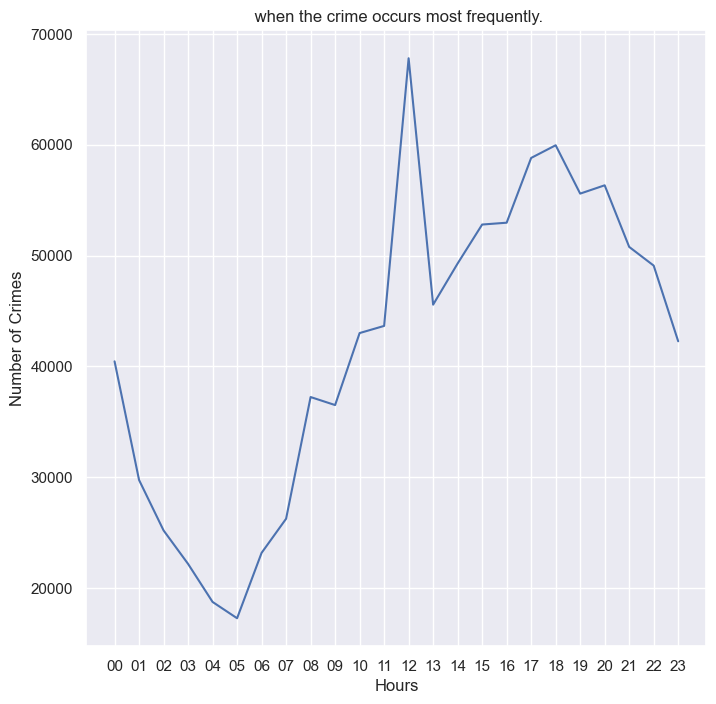

In [48]:
hour_grouped=df[['dr_no','hour']].groupby(by='hour',as_index=False).count()
sns.lineplot(x=hour_grouped['hour'],y=hour_grouped['dr_no'])

plt.title(" when the crime occurs most frequently.")
plt.xlabel("Hours")
plt.ylabel("Number of Crimes")



In [49]:
df.head(1)

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1-2,crm_cd_desc,mocodes,vict_age,vict_sex,vict_descent,premis_cd,weapon_used_cd,weapon_desc,status,status_desc,crm_cd_1,location,lat,lon,date_reported,year,hour
0,190326475,03/01/2020 12:00:00 AM,2020-03-01,21:30:00,7,Wilshire,784,1,VEHICLE - STOLEN,No Mocodes Given,<NA>,M,O,101.0,No Weapon Recorded,No Weapon Recorded,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,34.0375,-118.3506,2020-03-01,2020,21


In [50]:
df['month']=df['date_occ'].astype(str).str[5:7]

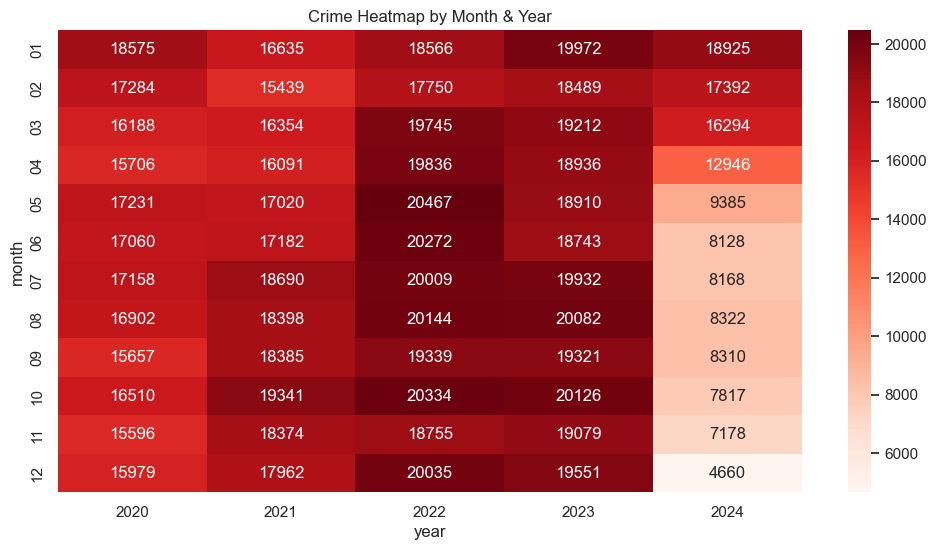

In [51]:
pivot_table = df.pivot_table(index="month", columns="year", values="crm_cd_1", aggfunc="count")

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="Reds", annot=True, fmt=".0f")
plt.title("Crime Heatmap by Month & Year")
plt.show()


In [52]:
df[['date_reported','date_occ']].duplicated().value_counts()

True     911235
False     93612
Name: count, dtype: int64

In [53]:
df['report_delay']=(df['date_reported']-df['date_occ']).dt.days
print("Median -",df['report_delay'].median())
print("Mean -",df['report_delay'].mean())


Median - 1.0
Mean - 12.155802823713461


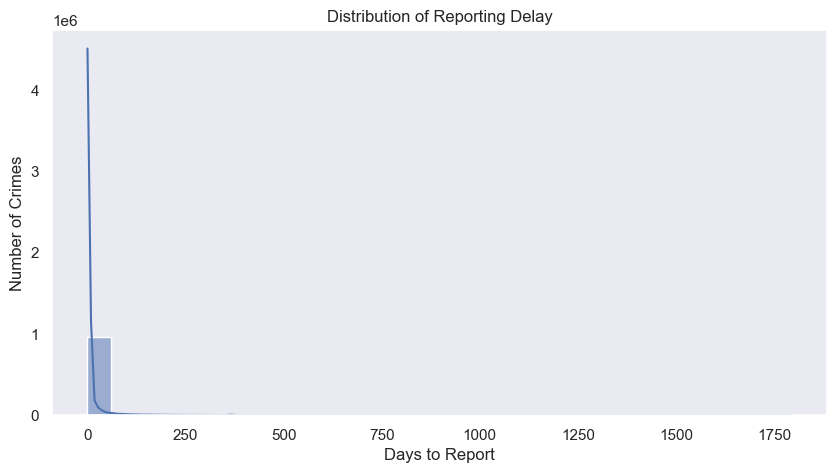

In [54]:
plt.figure(figsize=(10,5))
sns.histplot(df["report_delay"], bins=30, kde=True)
plt.xlabel("Days to Report")
plt.ylabel("Number of Crimes")
plt.title("Distribution of Reporting Delay")
plt.grid()
plt.show()


In [55]:
# which crime cases are under-investigation and did not solved form long 


# Key Findings
# Overall Crime Trend:
Crime rates increased between 2020 and 2023 but showed a sharp decline in 2024.

The peak crime rate was observed in 2023.


# Crime Categories & Frequency:
 The most common crimes are vehicle-stolen, simple-assault,burglary from vehicle.

# Safe Areas in LA 
The most safe areas in LA are 4,5,16,,19,21

# Dangerous Areas
The most dangerous areas are 1,3,6,12,14

# Investigation status
80% of investigations are still pending 

# Crimes according to age
age from 20-60 are targeted the most 

based on these insighsts we can take actions on spots ,areas


-------------------------------------------------------------------------------------------------------------------------------
# Upcomming analysis in this project 
average report delay according to the crime

which crime cases are under investigation and have not been solved for a long 

pattern of any particular crime on specific places 